# What are the job prospects for becoming a Data Analyst?
    
    #Which companies and locations have the best salary expections? ratings?
    #Correlation between Job Title and salary offered by the company?
    #Correlation between the size of the company and the salary?
    #Correlation between the ratings and salary?
    

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import linregress
import scipy.stats as st

In [2]:
# Load in file
file1 = "..\DataAnalystJobProspects\DataAnalyst.csv"

# Explore DataSet

In [3]:
#Read and display the CSV with Pandas
old_data = pd.read_csv(file1)
old_data.head(2)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1


# Clean DataSet

In [4]:
#Remove Unnamed Column
data = old_data.drop(columns=['Unnamed: 0', 'Job Description', 'Headquarters', 'Founded', 'Competitors', 'Revenue', "Easy Apply"])
data.head(2)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care


In [5]:
#Remove missing values. Replace all missing values in dataset
#data.dropna(inplace = True) only returns 28 values
data=data.replace(-1,np.nan)
data=data.replace(-1.0,np.nan)
data=data.replace('-1',np.nan)
data.head(5)


,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace\n3.4,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity\n4.1,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel\n3.9,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation"


In [6]:
try_this = data['Job Title'].str.split(',', n=1)
data['Job Title'],data['Department'] = try_this.str[0], try_this.str[1]

data.drop(columns = ["Department"], inplace = True)
data.head(2)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector
0,Data Analyst,$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice\n3.2,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York\n3.8,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care


In [7]:
try_it = data['Company Name'].str.split('\n', n=1)
data['Company Name'],data['R2'] = try_it.str[0], try_it.str[1]
                                                            
data.drop(columns = ["R2"], inplace = True)
data.head(2)


,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector
0,Data Analyst,$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care


In [8]:
by_salary = data['Salary Estimate'].str.split('(', n=1)
data['Salary Estimate'],data['Glass'] = by_salary.str[0], by_salary.str[1]

data.drop(columns = ["Glass"], inplace = True)

data.head(2)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector
0,Data Analyst,$37K-$66K,3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit
1,Quality Data Analyst,$37K-$66K,3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care


In [9]:
split_salary = data['Salary Estimate'].str.split('-', n=1)
data['Minimum Salary'],data['Maximum Salary'] = by_salary.str[0], by_salary.str[1]

#data.drop(columns = ["Glass"], inplace = True)

data.head(2)

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Minimum Salary,Maximum Salary
0,Data Analyst,$37K-$66K,3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$37K-$66K,Glassdoor est.)
1,Quality Data Analyst,$37K-$66K,3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$37K-$66K,Glassdoor est.)


In [10]:
# new data frame with split value columns 
new = data["Salary Estimate"].str.split("-", n = 1, expand = True) 
  
# making separate first name column from new data frame 
data["Minimum Salary"]= new[0] 
  
# making separate last name column from new data frame 
data["Maximum Salary"]= new[1] 

data.drop(columns = ["Salary Estimate"], inplace = True) 

data.head()

,Job Title,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Minimum Salary,Maximum Salary
0,Data Analyst,3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,$37K,$66K
1,Quality Data Analyst,3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$37K,$66K
2,Senior Data Analyst,3.4,Squarespace,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,$37K,$66K
3,Data Analyst,4.1,Celerity,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,$37K,$66K
4,Reporting Data Analyst,3.9,FanDuel,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$37K,$66K


In [11]:
data['Minimum Salary']=data['Minimum Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
data['Maximum Salary']=data['Maximum Salary'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')

data.head()

,Job Title,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Minimum Salary,Maximum Salary
0,Data Analyst,3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,37,66
1,Quality Data Analyst,3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,37,66
2,Senior Data Analyst,3.4,Squarespace,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,37,66
3,Data Analyst,4.1,Celerity,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,37,66
4,Reporting Data Analyst,3.9,FanDuel,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",37,66


# Companies with ratings of 3 or more

In [12]:
data_filtered = data[data['Rating']>= 3]
data_filtered.head()

,Job Title,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Minimum Salary,Maximum Salary
0,Data Analyst,3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,37,66
1,Quality Data Analyst,3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,37,66
2,Senior Data Analyst,3.4,Squarespace,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,37,66
3,Data Analyst,4.1,Celerity,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,37,66
4,Reporting Data Analyst,3.9,FanDuel,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",37,66


# Data Visualization

In [13]:
mean_salary_df = data_filtered.groupby('Job Title').mean()[['Minimum Salary', 'Maximum Salary']]
mean_salary_df

,Minimum Salary,Maximum Salary
Job Title,,
#104252 Division Data and Financial Analyst,34.0,61.0
#105009 Research Data Analyst,60.0,124.0
(Data Analyst) BA/BSA,45.0,78.0
(Data Risk Analyst: Data Modeler),35.0,67.0
(REMOTE) Sr. Risk Analyst (IT,73.0,89.0
...,...,...
Workforce Data Analyst,42.0,76.0
XYZ Data Analyst,29.0,38.0
a. Senior Data and Business Analyst,31.0,59.0


In [14]:
#sort dataframe in descending order
#head(20)
#Store in variable
#create plot graph

In [15]:
minimum_salary_mean = data["Minimum Salary"].mean()
minimum_salary_mean

54.242787394585

In [16]:
maximum_salary_mean = data["Maximum Salary"].mean()
maximum_salary_mean

89.93919218819352

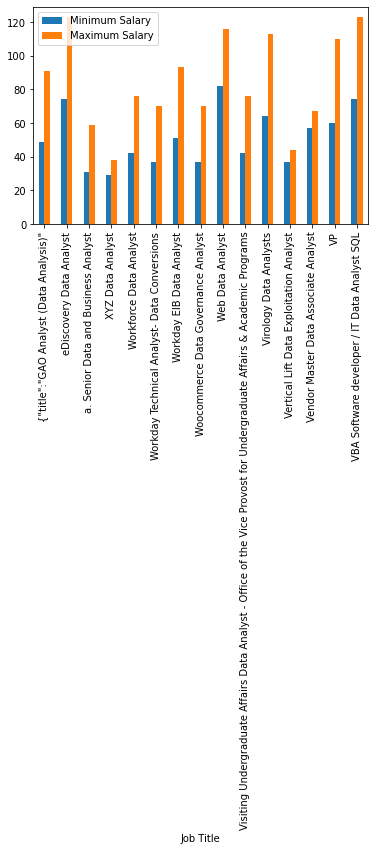

In [17]:
mean_salary_df.sort_values(by='Job Title', ascending=False)[:15].plot(kind='bar')


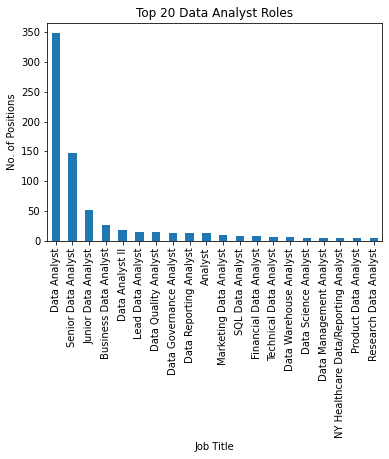

In [18]:
data_filtered = data_filtered.replace({
    
    "Sr. Data Analyst": "Senior Data Analyst", 
    "Sr Data Analyst": "Senior Data Analyst",
    "Master Data Analyst" : "Senior Data Analyst",
    'Sr Analyst': "Senior Data Analyst",
    "Sr. Analyst" : "Senior Data Analyst",
    "Senior Analyst" : "Senior Data Analyst",
    "Data Analyst Junior" : "Junior Data Analyst",
    "Data Analyst I" : "Junior Data Analyst",
    "Data Analyst 3" : 'Senior Data Analyst' ,
    "Data Analyst III" : "Senior Data Analyst"
    })
job_count = data_filtered["Job Title"].value_counts()
job_count.sort_values(ascending=False)[:20].plot(kind='bar')
plt.title("Top 20 Data Analyst Roles")
plt.xlabel("Job Title")
plt.ylabel("No. of Positions")
plt.savefig('../DataAnalystJobProspects/visualizations/Top20DataAnalystRoles')
plt.show()

In [19]:
title_count = data_filtered["Job Title"].value_counts()
title_count

Data Analyst                                               348
Senior Data Analyst                                        147
Junior Data Analyst                                         51
Business Data Analyst                                       26
Data Analyst II                                             18
                                                          ... 
Data Analyst Mentor                                          1
SAP Data Analyst (Contract)                                  1
Strategic Data Analyst III - Strategic Planning Divsion      1
Senior Data Analyst w/ Collibra                              1
Heightened Standards Data Analyst                            1
Name: Job Title, Length: 938, dtype: int64

In [20]:
job_salary = data_filtered.groupby('Job Title')
job_salary

In [21]:
sector = data_filtered["Sector"].value_counts()
sector

Information Technology                528
Business Services                     464
Finance                               149
Health Care                           133
Education                              49
Insurance                              46
Media                                  40
Accounting & Legal                     39
Manufacturing                          30
Retail                                 28
Biotech & Pharmaceuticals              27
Government                             23
Non-Profit                             21
Aerospace & Defense                    21
Transportation & Logistics             15
Consumer Services                      12
Oil, Gas, Energy & Utilities           12
Real Estate                            11
Construction, Repair & Maintenance     11
Telecommunications                     11
Arts, Entertainment & Recreation        6
Restaurants, Bars & Food Services       4
Mining & Metals                         1
Travel & Tourism                  

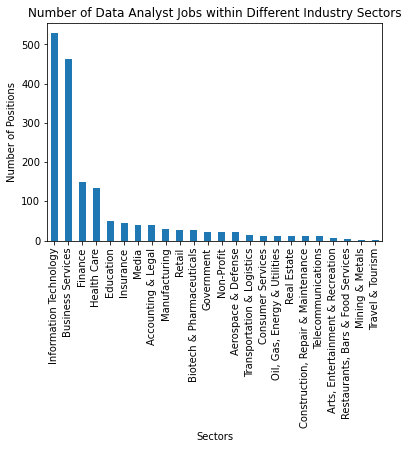

<Figure size 432x288 with 0 Axes>

In [22]:
count_sector = sector.plot(kind='bar')

# Set the xlabel and ylabel using class methods

plt.xlabel('Sectors')
plt.ylabel('Number of Positions')
plt.title("Number of Data Analyst Jobs within Different Industry Sectors")

plt.show()
plt.tight_layout()

plt.savefig('../DataAnalystJobProspects/visualizations/DifferentIndustrySectors')
plt.show()

# Word Cloud: Word cloud is a technique for visualising frequent words in a text where the size of the words represents their frequency.

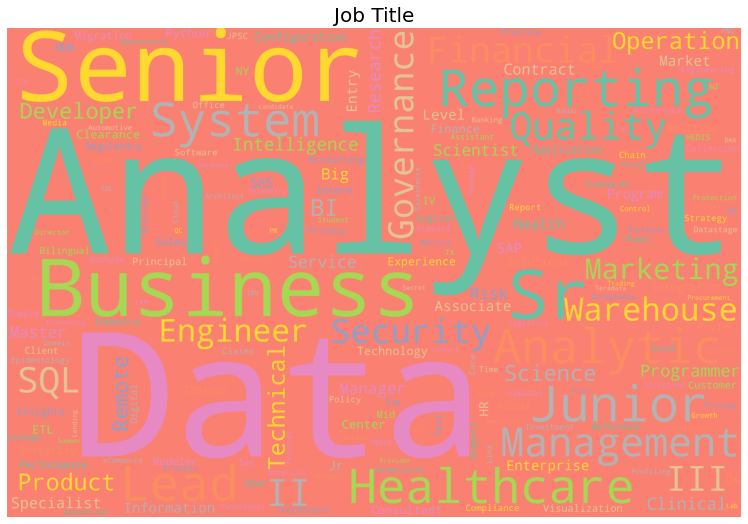

<Figure size 432x288 with 0 Axes>

In [23]:
frequent_words=data['Job Title']

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='salmon', colormap='Set2', 
                      collocations=False, stopwords = STOPWORDS).generate(' '.join(frequent_words))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(data['Job Title'].name,fontsize=20)
plt.imshow(wordcloud)
plt.show()

plt.savefig('../DataAnalystJobProspects/visualizations/WordCloud')
plt.show()

In [24]:
sector_salary = data.groupby(['Sector'])

sector_salary.head(2)

,Job Title,Rating,Company Name,Location,Size,Type of ownership,Industry,Sector,Minimum Salary,Maximum Salary
0,Data Analyst,3.2,Vera Institute of Justice,"New York, NY",201 to 500 employees,Nonprofit Organization,Social Assistance,Non-Profit,37,66
1,Quality Data Analyst,3.8,Visiting Nurse Service of New York,"New York, NY",10000+ employees,Nonprofit Organization,Health Care Services & Hospitals,Health Care,37,66
2,Senior Data Analyst,3.4,Squarespace,"New York, NY",1001 to 5000 employees,Company - Private,Internet,Information Technology,37,66
3,Data Analyst,4.1,Celerity,"New York, NY",201 to 500 employees,Subsidiary or Business Segment,IT Services,Information Technology,37,66
4,Reporting Data Analyst,3.9,FanDuel,"New York, NY",501 to 1000 employees,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",37,66
5,Data Analyst,3.9,Point72,"New York, NY",1001 to 5000 employees,Company - Private,Investment Banking & Asset Management,Finance,37,66
6,Business/Data Analyst (FP&A),4.4,Two Sigma,"New York, NY",1001 to 5000 employees,Company - Private,Investment Banking & Asset Management,Finance,37,66
7,Data Science Analyst,3.7,GNY Insurance Companies,"New York, NY",201 to 500 employees,Company - Private,Insurance Carriers,Insurance,37,66
9,Data Analyst,4.4,Riskified,"New York, NY",501 to 1000 employees,Company - Private,Research & Development,Business Services,37,66
10,Data Analyst,4.0,NYU Langone Health,"New York, NY",10000+ employees,Hospital,Health Care Services & Hospitals,Health Care,37,66


In [25]:
min_mean = sector_salary['Minimum Salary'].mean().round(3)
max_mean = sector_salary["Maximum Salary"].mean().round(3)

sector_salary_df = pd.DataFrame({'Minimum Salary Mean': min_mean,
                                'Maximum Salary Mean' : max_mean})

sector_salary_df.head()

,Minimum Salary Mean,Maximum Salary Mean
Sector,,
Accounting & Legal,58.512,91.930
Aerospace & Defense,51.955,85.045
"Arts, Entertainment & Recreation",60.429,100.857
Biotech & Pharmaceuticals,61.364,104.848
Business Services,54.405,89.866


In [26]:
groups = min_mean, max_mean
group_labels = ['Average Minimum Salary', 'Average Maximum Salary']

# Convert data to pandas DataFrame.
df = pd.DataFrame(groups, index=group_labels)

In [27]:
df

Sector,Accounting & Legal,Aerospace & Defense,"Arts, Entertainment & Recreation",Biotech & Pharmaceuticals,Business Services,"Construction, Repair & Maintenance",Consumer Services,Education,Finance,Government,...,Media,Mining & Metals,Non-Profit,"Oil, Gas, Energy & Utilities",Real Estate,"Restaurants, Bars & Food Services",Retail,Telecommunications,Transportation & Logistics,Travel & Tourism
Average Minimum Salary,58.512,51.955,60.429,61.364,54.405,53.812,53.143,51.808,50.645,48.056,...,51.833,41.0,49.115,48.000,57.250,39.0,49.079,51.727,53.4,57.0
Average Maximum Salary,91.930,85.045,100.857,104.848,89.866,88.125,89.857,87.327,84.645,80.583,...,85.119,78.0,82.423,78.538,104.583,69.0,84.289,89.000,85.3,67.0


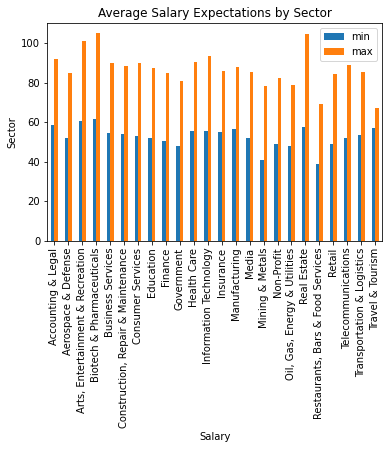

In [28]:
# Plot.
pd.concat(
    [df.min().rename('min'), 
     df.max().rename('max')],
    axis=1).plot.bar()

plt.title("Average Salary Expectations by Sector")
plt.xlabel("Salary")
plt.ylabel("Sector")
plt.savefig('../DataAnalystJobProspects/visualizations/SalarybySector')
plt.show()

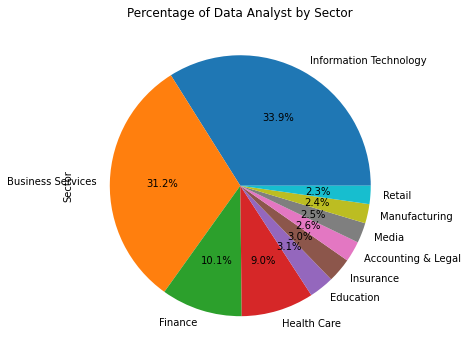

In [29]:
sector_type = data['Sector'].value_counts()


sector_type.sort_values(ascending=False)[:10].plot(kind='pie', 
                                                   subplots=True, 
                                                   figsize=(11, 6), 
                                                   autopct='%1.1f%%')
# Labels for the sections of our pie chart
plt.title("Percentage of Data Analyst by Sector")

plt.savefig('../DataAnalystJobProspects/visualizations/PercentageofDataAnalystbySector')
plt.show()

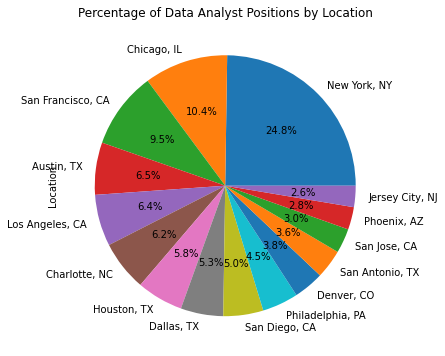

In [30]:
location_type = data['Location'].value_counts()

location_type.sort_values(ascending=False)[:15].plot(kind='pie', 
                                                     subplots=True,
                                                     figsize=(11, 6), 
                                                     autopct='%1.1f%%')
# Labels for the sections of our pie chart

plt.title("Percentage of Data Analyst Positions by Location")

plt.savefig('../DataAnalystJobProspects/visualizations/PercentageofDataAnalystbyLocation')
plt.show()

In [31]:
location_rating = data.groupby(['Location'])
loc_rate = pd.DataFrame(location_rating["Rating"].mean()).reset_index()
loc_rate

,Location,Rating
0,"Addison, TX",4.30
1,"Alachua, FL",3.30
2,"Alameda, CA",4.60
3,"Alhambra, CA",2.95
4,"Allegheny West, PA",3.80
...,...,...
248,"Woodbridge, NJ",3.40
249,"Woodcliff Lake, NJ",2.50
250,"Woodland Hills, CA",3.70
251,"Woodridge, IL",4.00


In [32]:
rate_loc = loc_rate.sort_values(by='Rating', ascending=False)
rate_loc.head(20)

,Location,Rating
182,"Portsmouth, VA",4.900000
11,"Athens, GA",4.800000
64,"Dublin, OH",4.750000
2,"Alameda, CA",4.600000
56,"Daly City, CA",4.600000
138,"Marin City, CA",4.500000
244,"Whippany, NJ",4.500000
216,"Spring, TX",4.400000
69,"Emeryville, CA",4.400000
88,"Gainesville, FL",4.385714


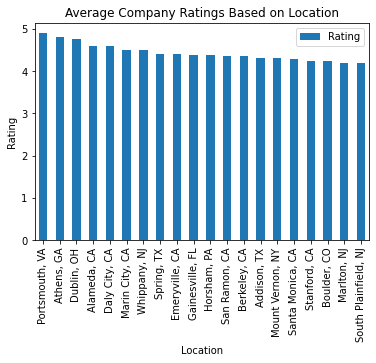

In [33]:
labels = []
indexes = []
for index, row in rate_loc.reset_index().iterrows():
    labels.append(row["Location"])
    indexes.append(index)
rate_loc.sort_values(by='Rating', ascending=False)[:20].plot(kind='bar')
plt.title("Average Company Ratings Based on Location")
plt.xlabel("Location")         
plt.xticks(indexes[:20], labels[:20])
plt.ylabel("Rating") 
plt.savefig('../DataAnalystJobProspects/visualizations/AverageCompanyRatingsBasedonLocation')
plt.show()